# Week 7 Exercises

This week we'll be exploring computer vision & neural networks by training a convolutional neural network (CNN) on ADDI (Automated computer-based Diagnosis system for Dermascopic Images) dataset. You are able to run this notebook on GPU to speed up training and predictions, since we are building a larger model than before (in the toolbar, click Edit->Notebook settings->Hardware accelerator). Run the below cell to get started (may take a few minutes to download data).

In [0]:
import os, scipy.ndimage
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import requests
import zipfile
import io

# Download and extract data.
r = requests.get("http://web.stanford.edu/class/cs21si/resources/unit4_resources.zip")
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

base_path = 'unit4_resources/addi/'
train_path = base_path + 'train'
val_path = base_path + 'val'
test_path = base_path + 'test'

Using TensorFlow backend.


## Exercise 1: Visualize the Data

Check out some of the images from the dataset by running the code below! Feel free to change the indices ("*idx*") to look through other images.

Showing normal image with index 0


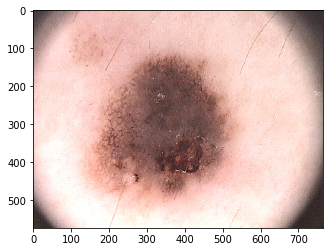

Showing abnormal image with index 0


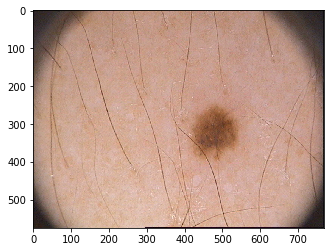

(None, None)

In [0]:
def show_example(label, idx=0):
    img_name = os.listdir('%s/%s' % (train_path, label))[idx]
    path = '%s/%s/%s' % (train_path, label, img_name)
    img = plt.imread(path)
    print('Showing %s image with index %d' % (label, idx))
    plt.figure()
    plt.imshow(img)
    plt.show()

show_example('normal', idx=0), show_example('abnormal', idx=0)

## Exercise 2: Train a Simple CNN

Now, we'll create a simple CNN model with just convolutional and fully-connected layers on the task. Much of the code is heavily influenced by [the Keras CNN tutorial](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), so definitely check that out!

### Load the data
Below, we have code that loads the data as an ImageDataGenerator, which will make it convenient for the Keras framework to deal with. Notice that the train generator has more input parameters--these are called data augmentations and allow us to generalize better when we have little training data. Read more about data augmentation [here](https://medium.com/nanonets/how-to-use-deep-learning-when-you-have-limited-data-part-2-data-augmentation-c26971dc8ced).

Run the code below to load the data.

In [0]:
def load_data(batch_size):
    train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(train_path, 
                                                        target_size=(150, 150),
                                                        batch_size=batch_size,
                                                        class_mode='binary')

    val_generator = test_datagen.flow_from_directory(val_path,
                                                            target_size=(150, 150),
                                                            batch_size=batch_size,
                                                            class_mode='binary')
    
    test_generator = test_datagen.flow_from_directory(test_path,
                                                      target_size=(150, 150),
                                                      batch_size=batch_size,
                                                      class_mode='binary')
    
    return train_generator, val_generator, test_generator

train_generator, val_generator, test_generator = load_data(16)

Found 125 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


### Create your Model

Write the code for your simple CNN below. Check out the [Keras documentation on CNNs](https://keras.io/layers/convolutional/) for reference!

In [0]:
def get_simple_cnn():
    ### YOUR CODE HERE ###
    model = Sequential()
    
    model.add(Conv2D(32, (6, 6), input_shape=(150, 150, 3)))
    model.add(Activation('relu'))

    model.add(Conv2D(32, (6, 6)))
    model.add(Activation('relu'))

    model.add(Conv2D(64, (6, 6)))
    model.add(Activation('relu'))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    ### END CODE ###
    return model

simple_model = get_simple_cnn()
simple_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 145, 145, 32)      3488      
_________________________________________________________________
activation_11 (Activation)   (None, 145, 145, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 140, 140, 32)      36896     
_________________________________________________________________
activation_12 (Activation)   (None, 140, 140, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 135, 135, 64)      73792     
_________________________________________________________________
activation_13 (Activation)   (None, 135, 135, 64)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1166400)           0         
__________

### Train the Model!

Run the code below to train your simple model on the training data, evaluating on the validation data at every epoch. You should get around 60% on the validation set with this model.

In [0]:
def train_model(model, train_generator, validation_generator, epochs=5):
    model.fit_generator(train_generator,
                        steps_per_epoch=len(train_generator),
                        epochs=epochs,
                        validation_data=validation_generator,
                        validation_steps=len(validation_generator))
    
train_model(simple_model, train_generator, val_generator, epochs=10)

Epoch 1/10
8/8 [==============================] - 6s 702ms/step - loss: 5.3108 - acc: 0.5863 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 2/10
8/8 [==============================] - 4s 453ms/step - loss: 6.4740 - acc: 0.5939 - val_loss: 4.7827 - val_acc: 0.7000
Epoch 3/10
8/8 [==============================] - 4s 480ms/step - loss: 6.5223 - acc: 0.5909 - val_loss: 7.3335 - val_acc: 0.5400
Epoch 4/10
8/8 [==============================] - 3s 405ms/step - loss: 6.3463 - acc: 0.6019 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 5/10
8/8 [==============================] - 4s 456ms/step - loss: 6.7990 - acc: 0.5736 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 6/10
8/8 [==============================] - 4s 469ms/step - loss: 6.4967 - acc: 0.5925 - val_loss: 6.6958 - val_acc: 0.5800
Epoch 7/10
8/8 [==============================] - 4s 470ms/step - loss: 6.4967 - acc: 0.5925 - val_loss: 4.7827 - val_acc: 0.7000
Epoch 8/10
8/8 [==============================] - 4s 473ms/step - loss: 5.6452 - acc: 0.64

## Exercise 3: Train an Advanced CNN

Now, we'll create a more advanced CNN model by adding max-pooling and spatial batch-normalization.

### Create your Model

Architect your advanced model below. Again, be sure to reference the [Keras CNN docs](https://keras.io/layers/convolutional/), as well as the [Keras Normalization docs](https://keras.io/layers/normalization/) (for the Spatial Batch Norm layer).

In [0]:
def get_advanced_cnn():
    ### YOUR CODE HERE ###
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=3))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=3))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=3))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    ### END CODE ###
    return model

advanced_model = get_advanced_cnn()
advanced_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_16 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_17 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 72, 72, 32)        128       
__________

### Train the Model!

Run the code below to train your advanced model on the training data, evaluating on the validation data at every epoch. You should be able to get around 70% accuracy on validation with this model.

In [0]:
train_model(advanced_model, train_generator, val_generator, epochs=10)

Epoch 1/10
8/8 [==============================] - 5s 569ms/step - loss: 2.5933 - acc: 0.5752 - val_loss: 3.9333 - val_acc: 0.6000
Epoch 2/10
8/8 [==============================] - 3s 372ms/step - loss: 1.4712 - acc: 0.6457 - val_loss: 1.9255 - val_acc: 0.5200
Epoch 3/10
8/8 [==============================] - 3s 379ms/step - loss: 0.8720 - acc: 0.7132 - val_loss: 0.8423 - val_acc: 0.6200
Epoch 4/10
8/8 [==============================] - 3s 380ms/step - loss: 0.5214 - acc: 0.7540 - val_loss: 4.2039 - val_acc: 0.5000
Epoch 5/10
8/8 [==============================] - 3s 382ms/step - loss: 1.0769 - acc: 0.6819 - val_loss: 0.6326 - val_acc: 0.8000
Epoch 6/10
8/8 [==============================] - 3s 379ms/step - loss: 0.9911 - acc: 0.7006 - val_loss: 1.8364 - val_acc: 0.5000
Epoch 7/10
8/8 [==============================] - 3s 383ms/step - loss: 0.8416 - acc: 0.6897 - val_loss: 2.1158 - val_acc: 0.6800
Epoch 8/10
8/8 [==============================] - 3s 381ms/step - loss: 0.6724 - acc: 0.71

### Evalutate the Model

Evaluate your model on the test set below! The first number is the loss, and the second is the accuracy. You should be able to get around 70% accuracy on the test set with your advanced model, but this will vary significantly due to randomness!

In [0]:
advanced_model.evaluate_generator(test_generator, len(test_generator))

[0.42724386930465696, 0.8800000023841857]

Great work! For homework, we'll see that our model is susceptible to adversarial attacks, images that look the same to humans but are perturbed in a very particular way in order to fool our model.